<a href="https://colab.research.google.com/github/bigDataNCloud/mgmt_467_resources/blob/main/Unit1_Labs/Lab_3_Data_Visualization_Dashboarding/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

- Exploratory is used to discover trend or paterns in a dataset, this is used for investigation. Exploratory is intended for the analyst or data scientist and does not need to look good or be highly polished.
- Explainatory is used to communicate a specific insight or story that has already been discovered. Explainatory is intended for stakeholder and decision makers and need to be easy to view and interpret.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  
   - Question archetype: "How do categories compare?”
   - Data shape: Categorical data on the x-axis, numerical values on the y-axis
   - Pitfalls:
      * Overloading with too many categories
      * Misleading axis scaling
      * Using 3D effects that distort perception
   - Alternatives:
      * Column chart (vertical bars)
      * Dot plot (for cleaner comparisons)
      * Treemap (for hierarchical categories)
2. **Line:**  
   - Question archetype: “How does something change over time?”
   - Data shape: Time series data with continuous values
   - Pitfalls:
      * Overplotting multiple lines without clear labels
      * Uneven time intervals
      * Ignoring missing data points
   - Alternatives:
      * Area chart (to show cumulative totals)
      * Slope chart (for comparing changes between two points)
      * Sparkline (for compact time trends)
3. **Scatter:**  
   - Question archetype: “Is there a relationship between two variables?”
   - Data shape: Two continuous variables plotted as points
   - Pitfalls:
      * Overplotting with large datasets (can obscure patterns)
      * Misinterpreting correlation as causation
      * Ignoring outliers
   - Alternatives:
      * Bubble chart (adds a third variable via size)
      * Hexbin plot (for dense data)
      * Pair plot (for multiple variable relationships)
4. **Histogram:**  
   - Question archetype: “What is the distribution of a single variable?”
   - Data shape: One continuous variable grouped into bins
   - Pitfalls:
      * Poor bin size selection (can hide or exaggerate patterns)
      * Confusing with bar charts (histograms show frequency, not categories)
      * Not normalizing when comparing groups
   - Alternatives:
      * Box plot (shows distribution and outliers)
      * Density plot (smooth version of histogram)
      * Violin plot (combines box and density)
5. **Map:**
   - Question archetype: “How does data vary across geography?”
   - Data shape: Geospatial data with coordinates or regions
   - Pitfalls:
      * Misleading area sizes (larger regions may dominate visually)
      * Color scales that distort perception
      * Ignoring population normalization
   - Alternatives:
      * Cartogram (distorts geography based on data)
      * Heatmap (for dense spatial data)
      * Dot density map (shows concentration)

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI: On-Time Rate

* Why it matters: Measures operational reliability and customer satisfaction.
* Best chart: Line chart showing trends over time.
* Drill-down fields: Airport, Flight number, Aircraft type, Time of day


2. KPI: Average Delay Minutes

* Why it matters: Identifies inefficiencies and operational bottlenecks.
* Best chart: Histogram for delay distribution or bar chart by airport/route.
* Drill-down fields: Delay cause, Route, Carrier, Day of week


3. KPI: Load Factor

* Why it matters: Indicates how efficiently seating capacity is used.
* Best chart: Gauge chart for current value or line chart for trends.
* Drill-down fields: Route, Aircraft type, Time period, Fare class


4. KPI: Yield (Revenue per Passenger Mile)

* Why it matters: Measures revenue efficiency and pricing strategy.
* Best chart: Bar chart by route or fare class, or line chart over time.
* Drill-down fields: Route, Fare class, Booking channel, Seasonality


5. KPI: Cancellation Rate

* Why it matters: Reflects reliability and impacts customer trust and revenue.
* Best chart: Stacked bar chart by reason or line chart over time.
* Drill-down fields: Cancellation reason, Airport, Carrier, Weather conditions  


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


Prompt A:

/tmp/ipython-input-922691547.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')


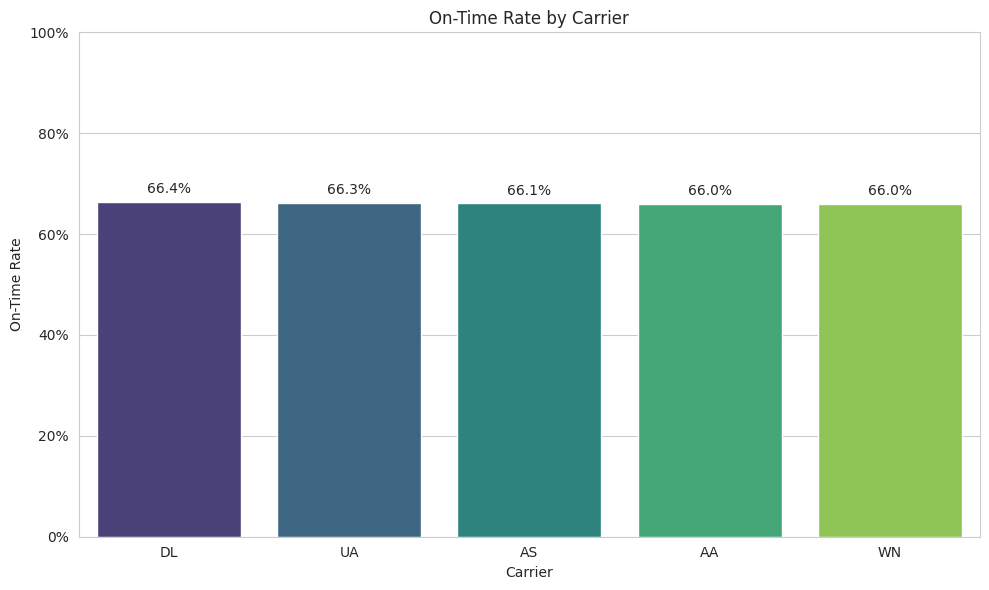

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate on-time rate by carrier and sort
on_time_rate = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Set labels and title
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate')
plt.title('On-Time Rate by Carrier')
plt.ylim(0, 1.0)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

plt.tight_layout()
plt.show()

Prompt B:

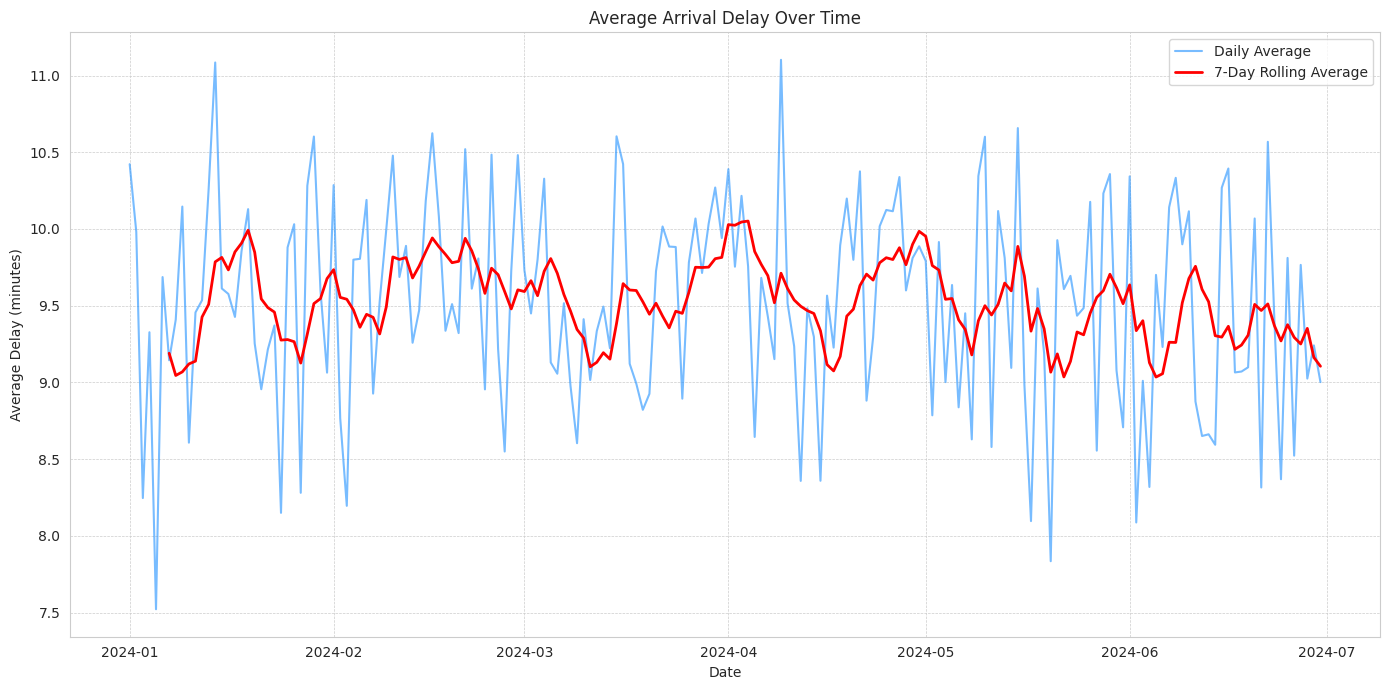

In [ ]:
import matplotlib.pyplot as plt

# Aggregate to daily average arrival delay
daily_delay = df_flights.groupby('date')['arr_delay_min'].mean()

# Calculate the 7-day rolling average
rolling_avg = daily_delay.rolling(window=7).mean()

# Create the line chart
plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')

plt.plot(daily_delay.index, daily_delay.values, label='Daily Average', alpha=0.6, color='dodgerblue')
plt.plot(rolling_avg.index, rolling_avg.values, label='7-Day Rolling Average', color='red', linewidth=2)

# Add axis labels, title, and grid
plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Prompt C:

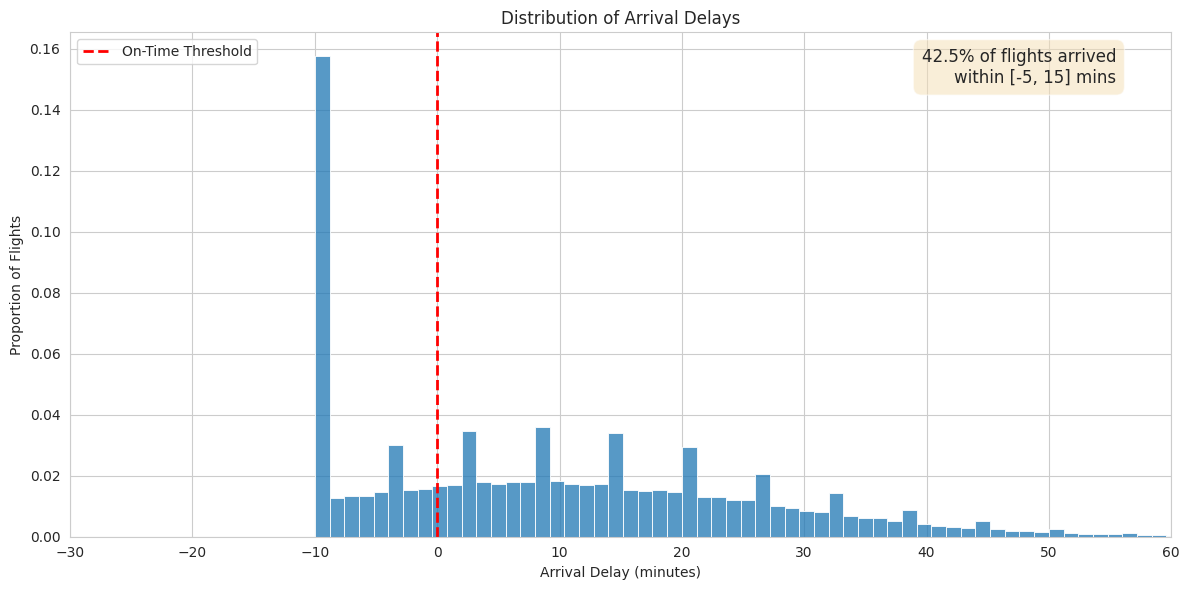

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Plot the histogram for delays in a reasonable range to see the distribution
ax = sns.histplot(df_flights['arr_delay_min'], bins=100, kde=False, stat="density")
plt.xlim(-30, 60) # Focus on the bulk of the distribution

# Add a vertical reference line at 0 minutes (on-time)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='On-Time Threshold')

# Calculate and annotate the percentage of flights within the [-5, 15] minute window
on_time_window_pct = (df_flights['arr_delay_min'].between(-5, 15)).mean()
ax.text(0.95, 0.9, f'{on_time_window_pct:.1%} of flights arrived\nwithin [-5, 15] mins',
        transform=ax.transAxes, # Use axis coordinates for placing text
        ha='right',
        fontsize=12,
        bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Add labels and title
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Proportion of Flights')
plt.legend()

plt.tight_layout()
plt.show()

Prompt D:

/tmp/ipython-input-4237827271.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_15_routes.values, y=route_labels, palette='magma')


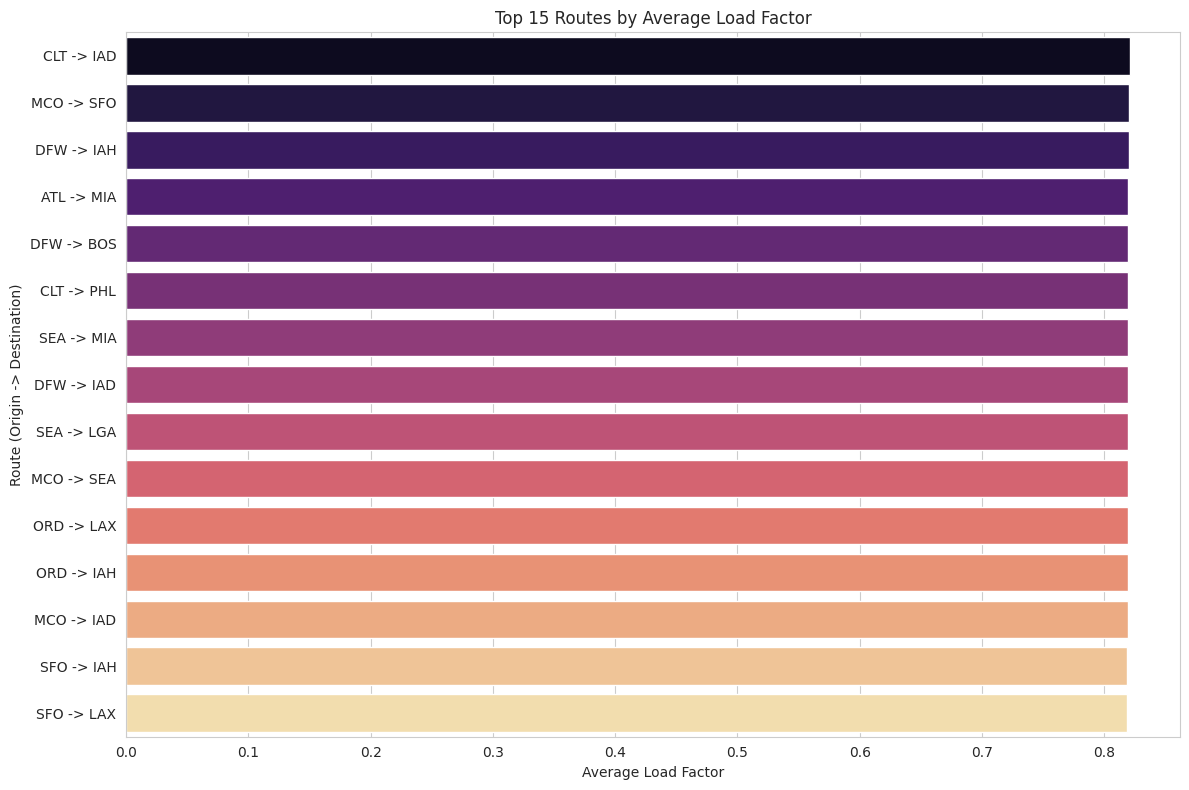

In [ ]:
# prompt: Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.

import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean load factor by route
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean()

# Get the top 15 routes
top_15_routes = route_load_factor.nlargest(15)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create route labels for plotting
route_labels = [f"{origin} -> {dest}" for origin, dest in top_15_routes.index]

ax = sns.barplot(x=top_15_routes.values, y=route_labels, palette='magma')

# Add labels and title
plt.title('Top 15 Routes by Average Load Factor')
plt.xlabel('Average Load Factor')
plt.ylabel('Route (Origin -> Destination)')

# Ensure labels are readable
plt.tight_layout()
plt.show()


Prompt E:

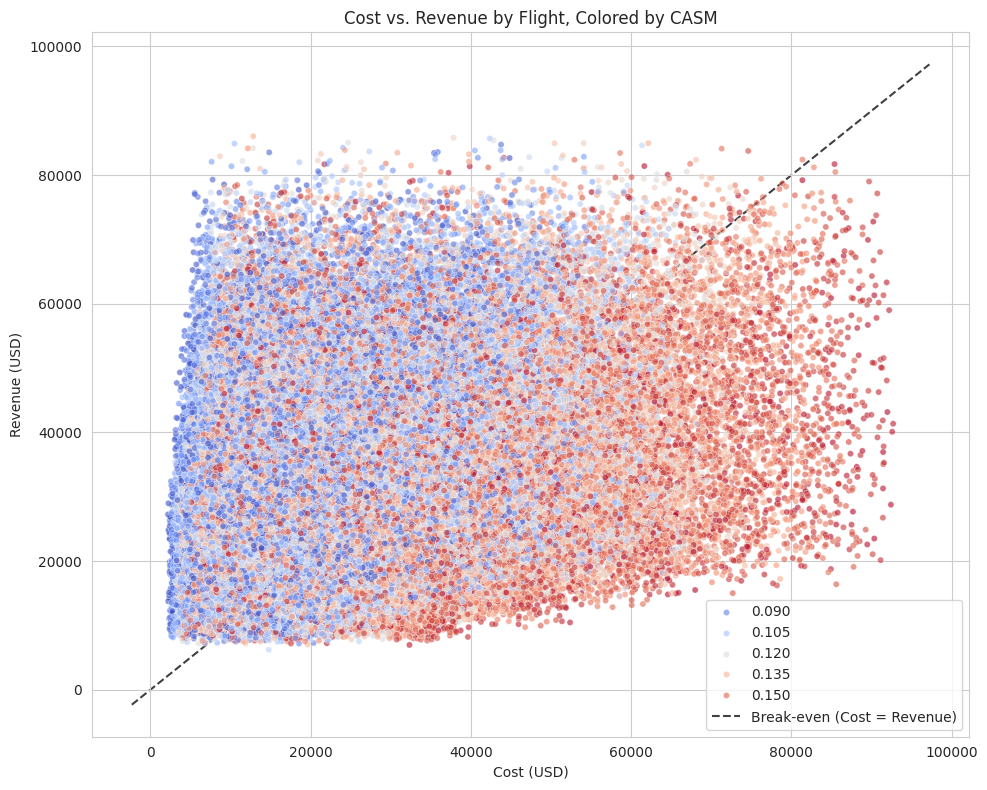

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')

# Create the scatter plot
scatter = sns.scatterplot(
    data=df_flights,
    x='cost_usd',
    y='revenue_usd',
    hue='casm',
    palette='coolwarm', # Use a diverging palette to show high/low cost efficiency
    alpha=0.6,
    s=20 # Adjust point size for better visibility
)

# Add the y=x reference line (break-even line)
# Get the current axis limits to draw the line across the plot
lims = [
    min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0]),  # Find the minimum of the x and y limits
    max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1]),  # Find the maximum of the x and y limits
]
plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0, label='Break-even (Cost = Revenue)')

# Add labels and title
plt.title('Cost vs. Revenue by Flight, Colored by CASM')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')

# Add a legend for the reference line
plt.legend()

plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='mgmt-467-nh')
table_id = 'mgmt-467-nh.lab1_foundation.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)


✅ Loaded to BigQuery: mgmt-467-nh.lab1_foundation.airline_kpis_synthetic


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
- One design decision that most improved dashboard clarity was limiting each chart to a single key message. By avoiding overcrowded visuals and focusing each chart on one KPI, the dashboard became easier to scan and interpret quickly. Additionally, using consistent color schemes and clear labels helped reduce cognitive load. If I were to improve it further, I would add interactive filters to allow users to drill down by route, time period, or aircraft type, making the dashboard more dynamic and actionable.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
